# Character Statistics
---

### Libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

### Settings

In [113]:
pd.options.mode.copy_on_write = True
# plt.style.use('dark_background')
# plt.style.use('default')
# plt.style.use('classic')
plt.style.use('ggplot')
# plt.style.use('bmh')
# plt.style.use('seaborn-v0_8')

### .csv formatting

In [114]:
# Open csv
with open("data/maria.csv", "r") as file: 
    reader = csv.reader(file) 
    
    with open("character-statistics.csv", "w") as result: 
        writer = csv.writer(result) 
        
        # Remove rows & columns
        i = 0
        for row in reader:
            if i != 0 and i != 1 and  i !=2:
                writer.writerow(row[1:])
   
            # Rename Alignment columns         
            if i == 1:
                row[5] = "Align_Law"
                row[6] = "Align_Moral"
                writer.writerow(row[1:])
            
            i += 1
        

In [115]:
# Make the dataframe
data = pd.read_csv("character-statistics.csv")

# Drop empty rows
data = data.dropna(subset=["Name"])
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,l3,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7
0,Apholia Brainir,Female,Aasimar,Medium,Lawful,Evil,31.0,Haunted One,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,Mage Slayer,Shadow Touched,NaN,NaN,NaN,NaN
1,Nuria Ember,Female,Shifter,Medium,Neutral,Good,40.0,Haunted One,Married,Alive,...,NaN,NaN,NaN,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,NaN,NaN,NaN,NaN
2,Gorin of the Ironhill,Male,Dwarf,Medium,Lawful,Good,155.0,Clan Crafter,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,NaN,NaN,NaN,NaN,NaN,NaN
3,Shyorin Baenre,Female,Elf,Medium,Neutral,Good,22.0,Acolyte,In Relationship,Alive,...,NaN,NaN,NaN,Ability Score Improvement,War Caster,Ability Score Improvement,NaN,NaN,NaN,NaN
4,Adam Scott,Male,Human,Medium,Neutral,Neutral,17.0,Spy,Single,Alive,...,NaN,NaN,NaN,Ability Score Improvement,NaN,NaN,NaN,NaN,NaN,NaN


### Data type transformation

In [116]:
# Gold to float 
data["Gold"] = data["Gold"].str.replace("g", "")
data["Gold"] = data["Gold"].str.replace(".", "")
data["Gold"] = data["Gold"].str.replace(",", ".")
data["Gold"] = pd.to_numeric(data["Gold"])

In [117]:
# Fill NaN values
data[["Gold", "l2", "l3", "l4"]] = data[["Gold", "l2", "l3", "l4"]].fillna(0.0)
data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]] = data[["Multiclass 1", "Multiclass 2", "Multiclass 3"]].fillna("No")
data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]] = data[["ASI 1", "ASI 2", "ASI 3", "ASI 4", "ASI 5", "ASI 6", "ASI 7"]].fillna("None")
data[["Level", "l1"]] = data[["Level", "l1"]].fillna(1.0)
data.head()

,Name,Gender,Race,Size,Align_Law,Align_Moral,Age,Background,Relationships,Wellbeing,...,l3,Multiclass 3,l4,ASI 1,ASI 2,ASI 3,ASI 4,ASI 5,ASI 6,ASI 7
0,Apholia Brainir,Female,Aasimar,Medium,Lawful,Evil,31.0,Haunted One,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,Mage Slayer,Shadow Touched,None,None,None,None
1,Nuria Ember,Female,Shifter,Medium,Neutral,Good,40.0,Haunted One,Married,Alive,...,0.0,No,0.0,Ability Score Improvement,Ability Score Improvement,Ability Score Improvement,None,None,None,None
2,Gorin of the Ironhill,Male,Dwarf,Medium,Lawful,Good,155.0,Clan Crafter,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,None,None,None,None,None,None
3,Shyorin Baenre,Female,Elf,Medium,Neutral,Good,22.0,Acolyte,In Relationship,Alive,...,0.0,No,0.0,Ability Score Improvement,War Caster,Ability Score Improvement,None,None,None,None
4,Adam Scott,Male,Human,Medium,Neutral,Neutral,17.0,Spy,Single,Alive,...,0.0,No,0.0,Ability Score Improvement,None,None,None,None,None,None


# First Look
---

## Numeric Data

In [118]:
data[["Age", "Gold", "Level"]].describe()

,Age,Gold,Level
count,27.000000,27.000000,27.000000
mean,59.962963,896.455556,6.814815
std,61.382459,2163.439036,5.061446
min,16.000000,10.000000,1.000000
25%,23.000000,10.000000,3.000000
50%,31.000000,10.000000,5.000000
75%,58.000000,500.000000,10.500000
max,230.000000,10000.000000,18.000000


## Categorical Data (Personal)

In [119]:
data[["Gender", "Race", "Size", "Align_Law", "Align_Moral", "Background", "Relationships", "Wellbeing", "Status"]].describe()

,Gender,Race,Size,Align_Law,Align_Moral,Background,Relationships,Wellbeing,Status
count,27,27,27,27,27,27,27,27,27
unique,2,19,2,3,3,18,5,2,3
top,Male,Human,Medium,Neutral,Good,Haunted One,Single,Alive,Retired
freq,15,5,24,18,16,6,23,25,11


## Gender

Text(0.5, 1.0, 'Gender')

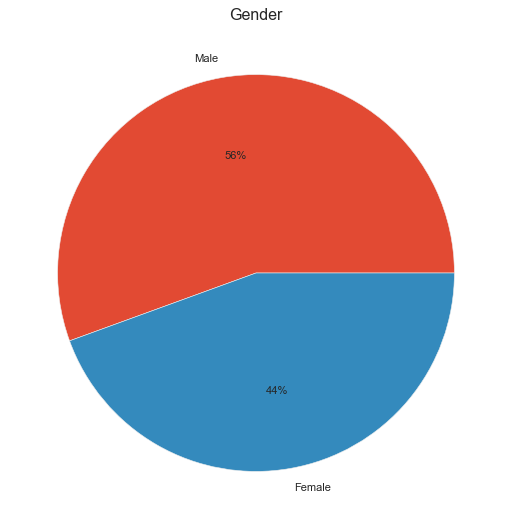

In [120]:
fig, ax = plt.subplots(figsize=(8, 8))

count = data.Gender.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Gender")

## Race & Size

Text(0.5, 1.0, 'Size')

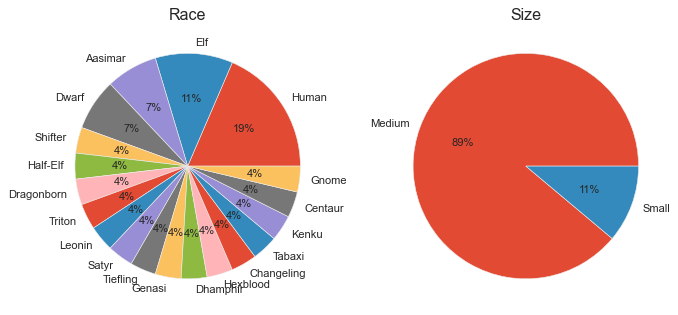

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Race.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index, autopct='%1.0f%%')
ax1.set_title('Race')

count = data.Size.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index, autopct='%1.0f%%')
ax2.set_title('Size')

## Alignment

Text(0.5, 1.0, 'Morality')

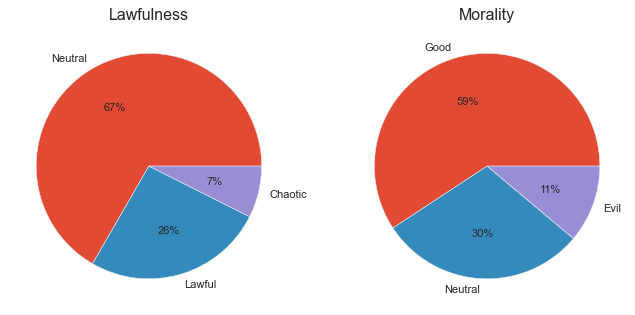

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

count = data.Align_Law.value_counts(sort=True, normalize=True)
ax1.pie(count, labels=count.index, autopct='%1.0f%%')
ax1.set_title('Lawfulness')

count = data.Align_Moral.value_counts(sort=True, normalize=True)
ax2.pie(count, labels=count.index, autopct='%1.0f%%')
ax2.set_title('Morality')

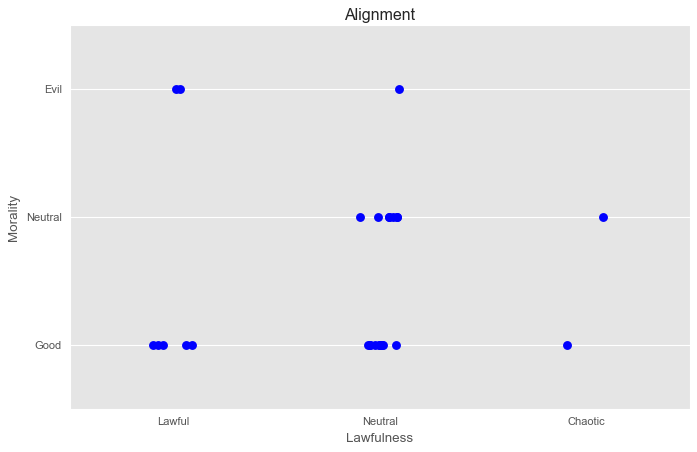

In [123]:
law_map = {"Lawful": 0, "Neutral": 1, "Chaotic": 2}
moral_map = {"Good": 0, "Neutral": 1, "Evil": 2}

alignment_mapped = data[["Align_Law", "Align_Moral"]]
alignment_mapped["Align_Law"] = alignment_mapped["Align_Law"].map(law_map)
alignment_mapped["Align_Moral"] = alignment_mapped["Align_Moral"].map(moral_map)

plt.figure(figsize=(10,6))
sns.stripplot(x="Align_Law", y="Align_Moral", data=alignment_mapped, jitter=True, size=8)

plt.xticks([0,1,2], ["Lawful", "Neutral", "Chaotic"])
plt.yticks([0,1,2], ["Good", "Neutral", "Evil"])

plt.xlabel("Lawfulness")
plt.ylabel("Morality")
plt.title("Alignment")
plt.show()  

## Background

Text(0.5, 1.0, 'Background')

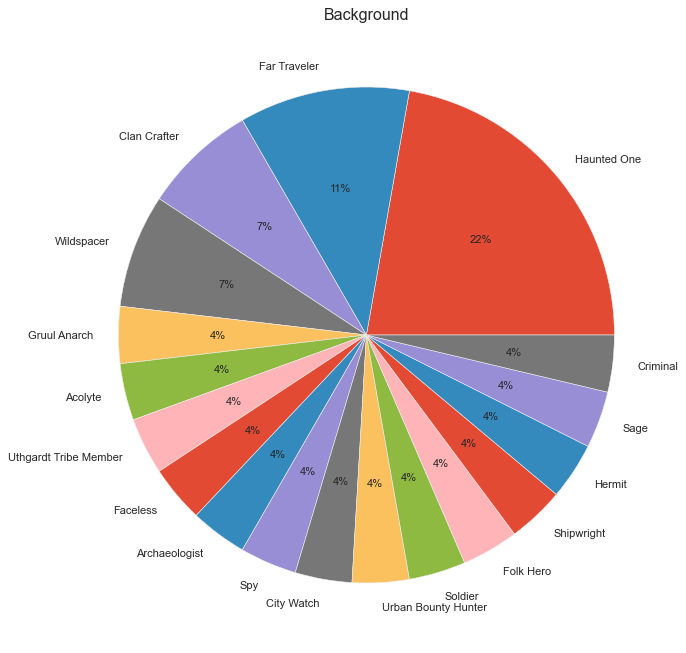

In [124]:
fig, ax = plt.subplots(figsize=(10, 10))

count = data.Background.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Background")

## Relationships

Text(0.5, 1.0, 'Relationships')

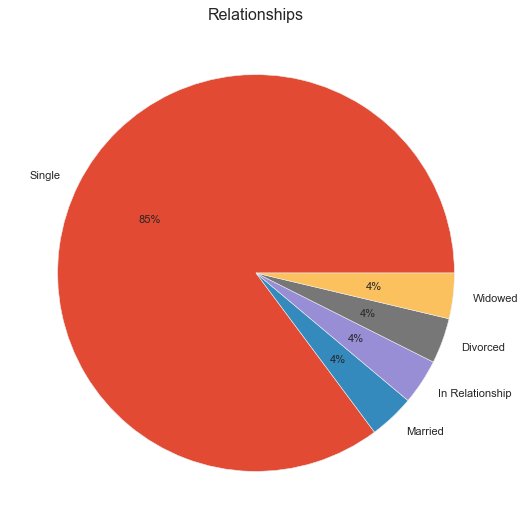

In [125]:
fig, ax = plt.subplots(figsize=(8,8))

count = data.Relationships.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Relationships")

## Wellbeing

Text(0.5, 1.0, 'Wellbeing')

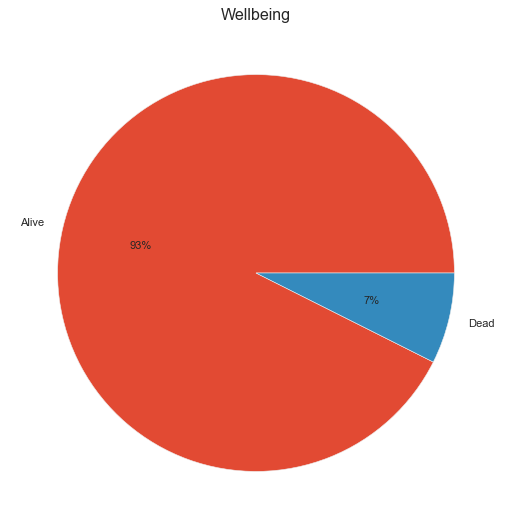

In [126]:
fig, ax = plt.subplots(figsize=(8,8))

count = data.Wellbeing.value_counts(sort=True, normalize=True)
ax.pie(count, labels=count.index, autopct='%1.0f%%')
ax.set_title("Wellbeing")